Data Source: https://www.kaggle.com/datasets/truecue/worldsustainabilitydataset?select=WorldSustainabilityDataset.csv

In [63]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('WorldSustainabilityDataset.csv')

In [3]:
df.head()

,Country Name,Country Code,Year,Access to electricity (% of population) - EG.ELC.ACCS.ZS,Adjusted net national income per capita (annual % growth) - NY.ADJ.NNTY.PC.KD.ZG,"Adjusted net savings, excluding particulate emission damage (% of GNI) - NY.ADJ.SVNX.GN.ZS",Adjusted savings: carbon dioxide damage (% of GNI) - NY.ADJ.DCO2.GN.ZS,Adjusted savings: natural resources depletion (% of GNI) - NY.ADJ.DRES.GN.ZS,Adjusted savings: net forest depletion (% of GNI) - NY.ADJ.DFOR.GN.ZS,Adjusted savings: particulate emission damage (% of GNI) - NY.ADJ.DPEM.GN.ZS,...,Gini index (World Bank estimate) - SI.POV.GINI,Income Classification (World Bank Definition),Individuals using the Internet (% of population) - IT.NET.USER.ZS,"Life expectancy at birth, total (years) - SP.DYN.LE00.IN","Population, total - SP.POP.TOTL",Regime Type (RoW Measure Definition),Rural population (% of total population) - SP.RUR.TOTL.ZS,Total natural resources rents (% of GDP) - NY.GDP.TOTL.RT.ZS,Urban population (% of total population) - SP.URB.TOTL.IN.ZS,World Regions (UN SDG Definition)
0,Aruba,ABW,2000,91.660398,NaN,15.392211,2.389134,0.000190,0.000190,NaN,...,NaN,High income,NaN,NaN,NaN,NaN,53.283,NaN,NaN,Latin America and Caribbean
1,Aruba,ABW,2001,100.000000,NaN,11.491930,2.509046,0.000214,0.000214,NaN,...,NaN,High income,17.1,73.853,92892.0,NaN,53.661,0.000712,46.339,Latin America and Caribbean
2,Aruba,ABW,2002,100.000000,NaN,3.893620,2.721385,0.000223,0.000223,NaN,...,NaN,High income,18.8,73.937,94992.0,NaN,54.028,0.000657,45.972,Latin America and Caribbean
3,Aruba,ABW,2003,100.000000,NaN,6.713863,2.733676,0.000243,0.000243,NaN,...,NaN,High income,20.8,74.038,97016.0,NaN,54.394,0.000700,45.606,Latin America and Caribbean
4,Aruba,ABW,2004,100.000000,NaN,9.801576,2.678363,0.000256,0.000256,NaN,...,NaN,High income,23.0,74.156,98744.0,NaN,54.760,0.000685,45.240,Latin America and Caribbean


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 54 columns):
 #   Column                                                                                        Non-Null Count  Dtype  
---  ------                                                                                        --------------  -----  
 0   Country Name                                                                                  3287 non-null   object 
 1   Country Code                                                                                  3287 non-null   object 
 2   Year                                                                                          3287 non-null   int64  
 3   Access to electricity (% of population) - EG.ELC.ACCS.ZS                                      3193 non-null   float64
 4   Adjusted net national income per capita (annual % growth) - NY.ADJ.NNTY.PC.KD.ZG              2566 non-null   float64
 5   Adjusted net savings, exclu

In [5]:
print(df.describe())

              Year  Access to electricity (% of population) - EG.ELC.ACCS.ZS  \
count  3287.000000                                        3193.000000          
mean   2009.000000                                          79.300662          
std       5.478059                                          30.398748          
min    2000.000000                                           1.270180          
25%    2004.000000                                          62.900000          
50%    2009.000000                                          98.653969          
75%    2014.000000                                         100.000000          
max    2018.000000                                         100.000000          

       Adjusted net national income per capita (annual % growth) - NY.ADJ.NNTY.PC.KD.ZG  \
count                                        2566.000000                                  
mean                                            2.499857                                  
std   

In [6]:
df['Life expectancy at birth, total (years) - SP.DYN.LE00.IN'].mean()

70.1600975609756

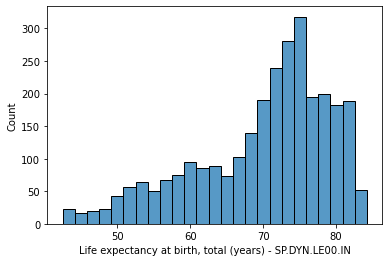

In [66]:
sns.histplot(data=df['Life expectancy at birth, total (years) - SP.DYN.LE00.IN']);

In [7]:
df['High_Life_Expectancy'] = np.where(df['Life expectancy at birth, total (years) - SP.DYN.LE00.IN'] >= 70, 1, 0)
df['High_Life_Expectancy'].value_counts()

High_Life_Expectancy
1    1932
0    1355
Name: count, dtype: int64

In [8]:
df = df[df['GDP per capita (current US$) - NY.GDP.PCAP.CD'].notna()]

In [9]:
df = df[df['Access to electricity (% of population) - EG.ELC.ACCS.ZS'].notna()]

In [10]:
df = df[df['Adjusted savings: particulate emission damage (% of GNI) - NY.ADJ.DPEM.GN.ZS'].notna()]

In [11]:
df = df[df['Adjusted savings: carbon dioxide damage (% of GNI) - NY.ADJ.DCO2.GN.ZS'].notna()]

In [12]:
df = df[df['GDP per capita (current US$) - NY.GDP.PCAP.CD'].notna()]

In [13]:
df = df[df['Urban population (% of total population) - SP.URB.TOTL.IN.ZS'].notna()]

In [14]:
df = df[df['Year'].notna()]

In [15]:
df = df[df['Rural population (% of total population) - SP.RUR.TOTL.ZS'].notna()]

In [16]:
# df = df[df['Gini index (World Bank estimate) - SI.POV.GINI'].notna()]

In [17]:
dummies = pd.get_dummies(df['Continent'])
df = pd.concat([df, dummies], axis=1)
df

,Country Name,Country Code,Year,Access to electricity (% of population) - EG.ELC.ACCS.ZS,Adjusted net national income per capita (annual % growth) - NY.ADJ.NNTY.PC.KD.ZG,"Adjusted net savings, excluding particulate emission damage (% of GNI) - NY.ADJ.SVNX.GN.ZS",Adjusted savings: carbon dioxide damage (% of GNI) - NY.ADJ.DCO2.GN.ZS,Adjusted savings: natural resources depletion (% of GNI) - NY.ADJ.DRES.GN.ZS,Adjusted savings: net forest depletion (% of GNI) - NY.ADJ.DFOR.GN.ZS,Adjusted savings: particulate emission damage (% of GNI) - NY.ADJ.DPEM.GN.ZS,...,Total natural resources rents (% of GDP) - NY.GDP.TOTL.RT.ZS,Urban population (% of total population) - SP.URB.TOTL.IN.ZS,World Regions (UN SDG Definition),High_Life_Expectancy,Africa,Asia,Europe,North America,Oceania,South America
20,Angola,AGO,2001,20.000000,18.457388,-21.156996,2.560090,29.555094,0.0,1.886837,...,38.434427,51.274,Sub-Saharan Africa,0,True,False,False,False,False,False
21,Angola,AGO,2002,26.383869,37.239379,5.021282,1.869649,18.789640,0.0,1.552627,...,27.693387,52.461,Sub-Saharan Africa,0,True,False,False,False,False,False
22,Angola,AGO,2003,27.465635,6.421468,5.148920,1.182633,15.722121,0.0,1.511743,...,24.048765,53.645,Sub-Saharan Africa,0,True,False,False,False,False,False
23,Angola,AGO,2004,28.536760,-8.470402,-1.547946,1.966160,29.984685,0.0,1.426805,...,40.193700,54.827,Sub-Saharan Africa,0,True,False,False,False,False,False
24,Angola,AGO,2005,29.596224,7.704993,1.694223,1.352846,36.249946,0.0,1.238411,...,45.827185,56.000,Sub-Saharan Africa,0,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3282,Zimbabwe,ZWE,2014,32.300000,0.763955,-14.094023,2.310859,1.573499,0.0,1.426705,...,5.531514,32.504,Sub-Saharan Africa,0,True,False,False,False,False,False
3283,Zimbabwe,ZWE,2015,33.700000,10.749009,-18.882831,2.381654,0.844003,0.0,1.492774,...,4.561981,32.385,Sub-Saharan Africa,0,True,False,False,False,False,False
3284,Zimbabwe,ZWE,2016,39.676228,-0.716048,-11.199213,2.101249,0.823740,0.0,1.496494,...,4.473632,32.296,Sub-Saharan Africa,0,True,False,False,False,False,False
3285,Zimbabwe,ZWE,2017,40.144283,28.172572,-12.700238,2.102515,1.300127,0.0,1.422511,...,4.844665,32.237,Sub-Saharan Africa,0,True,False,False,False,False,False


In [18]:
df['High_Life_Expectancy'].value_counts()

High_Life_Expectancy
1    1760
0    1105
Name: count, dtype: int64

In [19]:
y = df['High_Life_Expectancy']
X = df[['GDP per capita (current US$) - NY.GDP.PCAP.CD',  'Access to electricity (% of population) - EG.ELC.ACCS.ZS',
       'Adjusted savings: particulate emission damage (% of GNI) - NY.ADJ.DPEM.GN.ZS', 
        'Adjusted savings: carbon dioxide damage (% of GNI) - NY.ADJ.DCO2.GN.ZS', 
        'Urban population (% of total population) - SP.URB.TOTL.IN.ZS', 'Year',
       'Rural population (% of total population) - SP.RUR.TOTL.ZS', 'Africa']]

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5, random_state=42)

ss = StandardScaler()
ss.fit(X_train)
X_standardized_train = ss.transform(X_train)
X_standardized_test = ss.transform(X_test)


model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)

print(f'The classifier has an accuracy score of {round(accuracy_score(y_test, y_test_pred), 3)}.')

The classifier has an accuracy score of 0.913.


In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5, random_state=42)

ss = StandardScaler()
ss.fit(X_train)
X_standardized_train = ss.transform(X_train)
X_standardized_test = ss.transform(X_test)


model_2 = LogisticRegression(random_state=42)
model_2.fit(X_standardized_train, y_train)
y_test_pred = model_2.predict(X_standardized_test)

print(f'The classifier has an accuracy score of {round(accuracy_score(y_test, y_test_pred), 3)}.')

The classifier has an accuracy score of 0.913.


In [53]:
model_2.coef_

array([[ 1.20172058,  2.40894841, -1.09019661, -1.12133361,  0.18125071,
         0.18747283, -0.18125071, -0.52023043]])

In [54]:
# Within our logistic regression "Access to Electricity" has the largest positive affect on our model and particulate 
# emmissions damage has the largest negative affect on our model

In [55]:
from sklearn.metrics import r2_score
r2_score(y_test, y_test_pred)

0.6348594443531153

In [56]:
scaled_pipeline = Pipeline([('ss', StandardScaler()), ('RF', RandomForestClassifier(random_state=123))])

In [57]:
grid = [{'RF__max_depth': [4, 5, 6], 
         'RF__min_samples_split': [2, 5, 10], 
         'RF__min_samples_leaf': [1, 3, 5]}]

In [58]:
gridsearch = GridSearchCV(estimator=scaled_pipeline, 
                          param_grid=grid, 
                          scoring='accuracy', 
                          cv=5)

In [59]:
# Fit the training data
gridsearch.fit(X_train, y_train)

# Print the accuracy on test set
gridsearch.score(X_test, y_test)


0.944870900209351

In [60]:
gridsearch.best_params_

{'RF__max_depth': 6, 'RF__min_samples_leaf': 1, 'RF__min_samples_split': 2}

In [61]:
y_test_pred = gridsearch.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test, y_test_pred)

0.7673701298701299

In [62]:
good_data = pd.concat([y, X], axis=1)

In [43]:
good_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2865 entries, 20 to 3286
Data columns (total 9 columns):
 #   Column                                                                        Non-Null Count  Dtype  
---  ------                                                                        --------------  -----  
 0   High_Life_Expectancy                                                          2865 non-null   int64  
 1   GDP per capita (current US$) - NY.GDP.PCAP.CD                                 2865 non-null   float64
 2   Access to electricity (% of population) - EG.ELC.ACCS.ZS                      2865 non-null   float64
 3   Adjusted savings: particulate emission damage (% of GNI) - NY.ADJ.DPEM.GN.ZS  2865 non-null   float64
 4   Adjusted savings: carbon dioxide damage (% of GNI) - NY.ADJ.DCO2.GN.ZS        2865 non-null   float64
 5   Urban population (% of total population) - SP.URB.TOTL.IN.ZS                  2865 non-null   float64
 6   Year                                 

In [44]:
good_data.to_csv('good_data.csv')

In [48]:
best_model = gridsearch.best_estimator_

In [67]:
classifier = gridsearch.best_estimator_.named_steps['RF']

In [73]:
print(classifier.get_params)

<bound method BaseEstimator.get_params of RandomForestClassifier(max_depth=6, random_state=123)>
